Uses an aritificial recurrent neural network using Long Short Term Memory (LSTM) to predict the closing stock price of NVIDA using the past 60 day stock price. Tutorial from: https://www.youtube.com/watch?v=QIUxPv5PJOY&ab_channel=ComputerScience

In [59]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')


In [60]:
#Get the stock quote
df = web.DataReader('NVDA', data_source = 'yahoo', start = date.today() + relativedelta(years = -5), end = date.today())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-19,49.500000,48.112499,48.610001,49.450001,57077200.0,48.929619
2017-10-20,49.897499,49.134998,49.622501,49.224998,45162000.0,48.706974
2017-10-23,49.712502,48.950001,49.445000,49.154999,42869600.0,48.637718
2017-10-24,49.687500,48.985001,49.247501,49.669998,40724400.0,49.147282
2017-10-25,49.805000,47.792500,49.270000,48.415001,82816000.0,47.905502
...,...,...,...,...,...,...
2022-10-13,120.779999,108.129997,109.709999,119.599998,85010300.0,119.599998
2022-10-14,121.110001,112.040001,120.570000,112.269997,71255100.0,112.269997
2022-10-17,119.480003,115.169998,115.180000,118.879997,58077400.0,118.879997


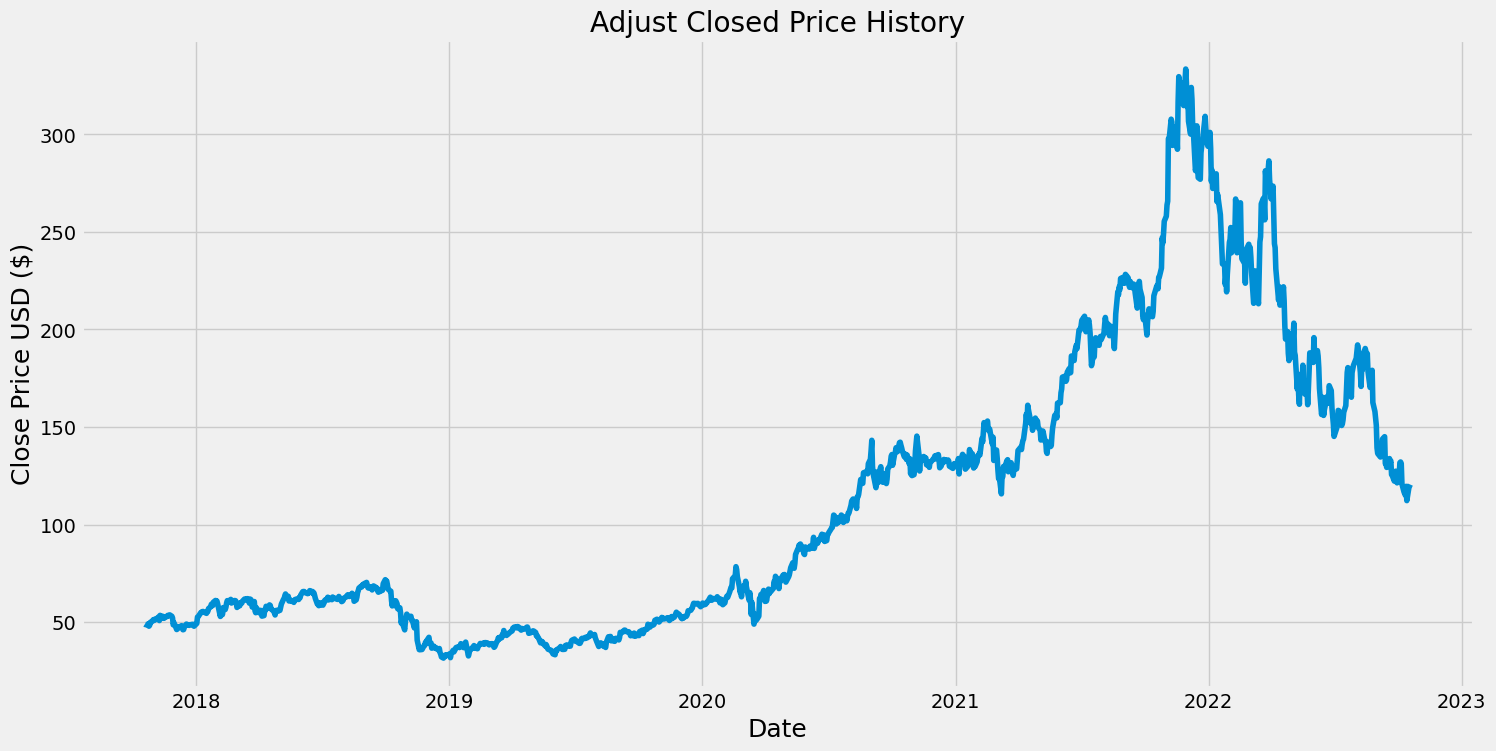

In [61]:
#Visualise the adjusted close history
plt.figure(figsize = (16,8))
plt.title('Adjust Closed Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [62]:
#Create a new dataframe with only the 'Adj Close' column
data = df.filter(['Adj Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on (60/40 Training/Test split)
training_data_len = math.ceil(len(dataset) * 0.6)

training_data_len

756

In [63]:
#Scale the data as part of data pre-processing
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05757407],
       [0.05683671],
       [0.05660735],
       ...,
       [0.28923822],
       [0.29185457],
       [0.29463653]])

In [64]:
#Create the training data set
train_data = scaled_data[0:training_data_len, :]
#Split into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #x_train will have the 60 values
    y_train.append(train_data[i, 0]) #y_train will contain the 61st value

In [65]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [66]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [67]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False, input_shape = (x_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))



In [68]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

696/696 [==============================] - 14s 17ms/step - loss: 6.1859e-04


In [70]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Split into x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) #x_train will have the 60 values

In [71]:
#Convert data to numpy array
x_test = np.array(x_test)

In [72]:
#Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [73]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions

16/16 [==============================] - 1s 11ms/step


array([[115.11775 ],
       [114.82214 ],
       [114.38148 ],
       [114.015305],
       [113.46645 ],
       [112.99391 ],
       [112.16642 ],
       [111.41278 ],
       [110.47794 ],
       [109.530304],
       [108.8868  ],
       [108.90216 ],
       [109.5125  ],
       [110.660545],
       [111.52647 ],
       [111.68398 ],
       [111.77166 ],
       [111.82672 ],
       [111.76961 ],
       [111.773445],
       [111.760445],
       [111.74323 ],
       [111.73131 ],
       [111.52584 ],
       [111.25044 ],
       [110.84955 ],
       [110.558235],
       [110.36623 ],
       [110.32635 ],
       [110.37335 ],
       [110.55588 ],
       [110.72459 ],
       [110.96483 ],
       [111.2567  ],
       [111.41468 ],
       [111.24764 ],
       [110.92295 ],
       [110.54874 ],
       [110.33689 ],
       [110.265076],
       [110.21667 ],
       [110.24198 ],
       [110.270004],
       [110.33172 ],
       [110.378365],
       [110.2621  ],
       [110.0491  ],
       [109.7

In [74]:
#Evaluate the model using RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

34.200104912517084

C:\Users\65903\AppData\Local\Temp\ipykernel_8064\3054959948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


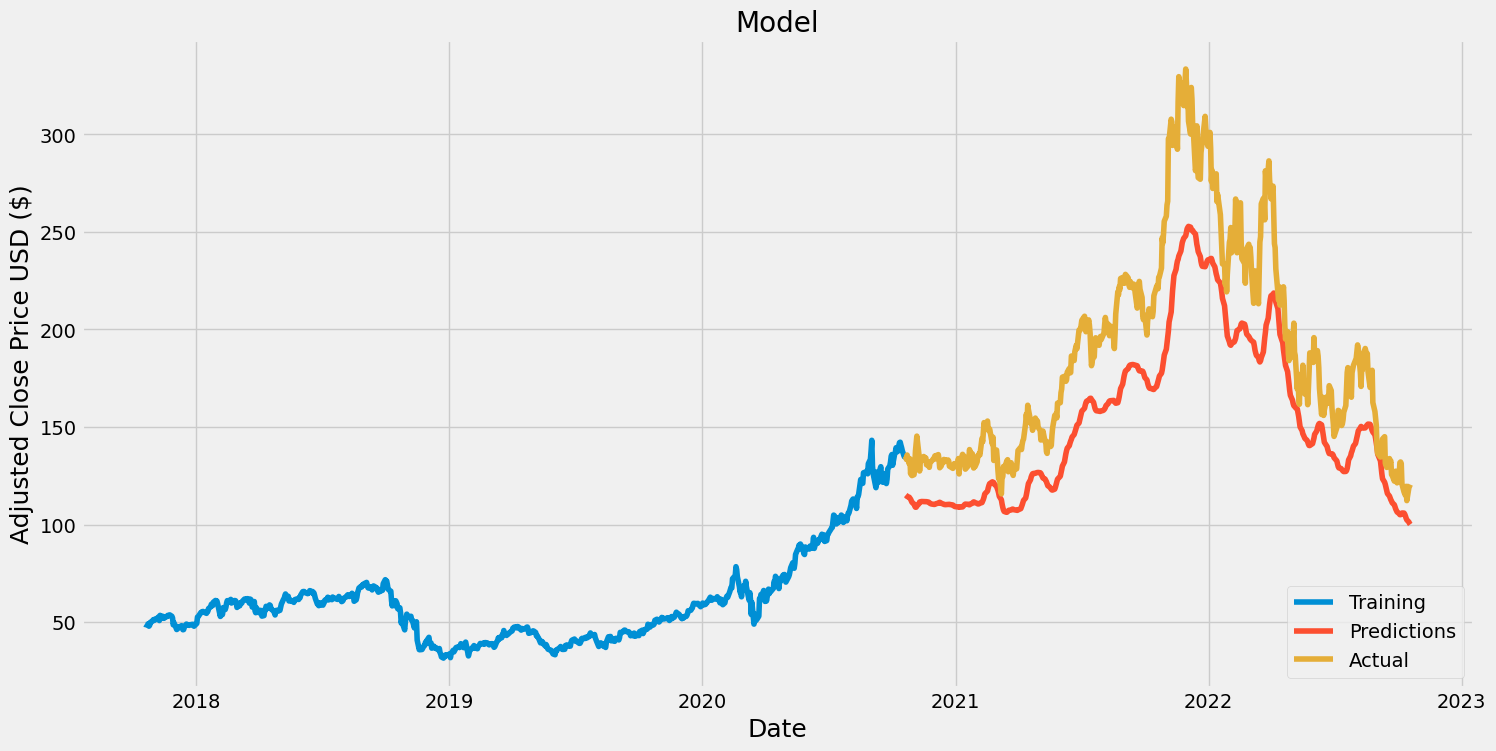

In [83]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Data Visualisation
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Date', fontsize = 18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid['Predictions'])
plt.plot(valid['Adj Close'])
plt.legend(['Training', 'Predictions', 'Actual'], loc = 'lower right')